### Imports

In [1]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Useful expressions and functions

In [2]:
DATA_FOLDER = '../data_clean'
# Precomputed regular expression to check if a column is corresponding to a date
IS_DATE = re.compile("^[1-2]{1}[0-9]{3}$")

In [3]:
def describeDf(df,name="DESCRIPTION",level=1):
    """
    Describe the data. Different levels are possible.
    Level 0: Name the different columns
    Level 1: Explore the values of each column
    """
    # Print a header
    print("______________________________ " + name+" ______________________________\n")
    
    date = []
    
    # For level 1
    if(level==1):
        print("\n")
        # Go through the columns
        for col in df.columns:
            # Explore and print the unique values of columns not corresponding to a date
            if((not IS_DATE.match(col)) & (not re.compile("[0-9]+ an").match(col))):
                # Header
                print("         ATTRIBUTE: "+col)
                # Values in the columns
                print("   "+str(df[col].unique()))
                print("\n")
            else:
                date.append(col)
        # Print the dates columns
        print("         VALUES: "+str(date))
        print("\n\n\n")
    # For level 0
    elif(level==0) :
        print(df.columns.values)
        print("\n\n\n")
    # Raise an error if the level value doesn't exist
    else:
        raise NotImplementedError

## Load and describe the data

In [121]:
print("Dataframes available:\n\n")
for file in os.listdir(DATA_FOLDER):
    filename = os.fsdecode(file)
    tablename = "df_"+os.path.splitext(os.path.splitext(filename)[0])[0]
    globals()[tablename] = pd.read_csv(DATA_FOLDER + '/' + filename)
    try:
        globals()[tablename] = globals()[tablename].drop(columns=['Unnamed: 0'])
    except:
        pass
    describeDf(globals()[tablename], name=tablename,level=0)
    

Dataframes available:


______________________________ df_Accident_cantons ______________________________

['canton_index' 'canton' 'gravite_index' 'gravite' 'ruralite_index'
 'ruralite' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017']




______________________________ df_Accident_circonstances ______________________________

['mois_index' 'mois' 'day_index' 'day' 'hours_index' 'hours'
 'gravite_index' 'gravite' 'ruralite_index' 'ruralite' 'contexte_index'
 'contexte' 'circonstance_index' 'circonstance' '1992' '1993' '1994'
 '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017']




______________________________ df_Accident_objets ______________________________

['voiture_index' 'voiture' 'age_index' 'age' 'sexe_index' 'sexe'
 'annee_permis_in

### Study of correlations with household spendings

In [122]:
# RUN ONLY ONCE
df_Depense_menages_canton['Canton'] = df_Depense_menages_canton['Canton'].apply(lambda x: getKeysByValue(dict_cantons, x))
spend_fuel = df_Depense_menages_canton[df_Depense_menages_canton['Mode'] == 'Tot']\
                                    [['annee', 'Canton','Carburants et lubrifiants']]
spend_alcool = df_Depense_menages_canton[df_Depense_menages_canton['Mode'] == 'Tot']\
                                    [['annee', 'Canton','Eaux-de-vie']]
spend_biere = df_Depense_menages_canton[df_Depense_menages_canton['Mode'] == 'Tot']\
                                    [['annee', 'Canton','Bières']]
df_Accident_cantons['canton'] = df_Accident_cantons['canton'].apply(lambda x: getKeysByValue(dict_cantons, x))

In [125]:
df_Accident_cantons = df_Accident_cantons.dropna(axis=0)
df_Accident_cantons['2006–2008'] = df_Accident_cantons.apply(lambda df: df['2006'] + df['2007'] + df['2008'], axis=1)
df_Accident_cantons['2009–2011'] = df_Accident_cantons.apply(lambda df: df['2009'] + df['2010'] + df['2011'], axis=1)
df_Accident_cantons['2012–2014'] = df_Accident_cantons.apply(lambda df: df['2012'] + df['2013'] + df['2014'], axis=1)

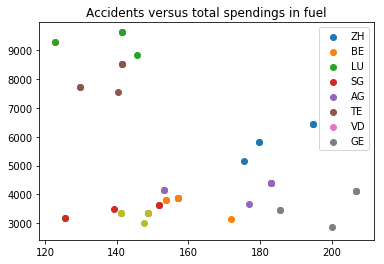

In [129]:
df_accident_canton = df_Accident_cantons.groupby(['canton']).sum()[['2006–2008', '2009–2011', '2012–2014']]
xSpendFuel = []
yAccident = []
for canton in spend_fuel['Canton'].unique():
    xSpendFuel = []
    yAccident = []
    for period in spend_fuel['annee'].unique():
        xSpendFuel.append(float(spend_fuel[(spend_fuel.Canton == canton) & (spend_fuel.annee == period)]['Carburants et lubrifiants']))
        yAccident.append(df_accident_canton[period][canton])
        plt.scatter(xSpendFuel, yAccident)
        
plt.legend(spend_fuel['Canton'].unique())
plt.title('Accidents versus total spendings in fuel')
plt.show()

ValueError: could not convert string to float: '( )'

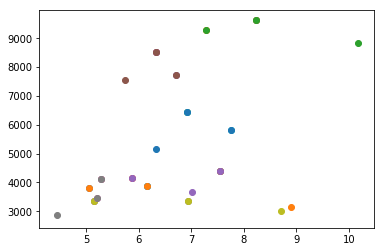

In [130]:
df_accident_canton = df_Accident_cantons.groupby(['canton']).sum()[['2006–2008', '2009–2011', '2012–2014']]

xSpendFuel = []
yAccident = []
for canton in spend_alcool['Canton'].unique():
    xSpendFuel = []
    yAccident = []
    for period in spend_alcool['annee'].unique():
        xSpendFuel.append(float(spend_alcool[(spend_alcool.Canton == canton) & (spend_alcool.annee == period)]['Eaux-de-vie']))
        yAccident.append(df_accident_canton[period][canton])
        plt.scatter(xSpendFuel, yAccident)
        
plt.legend(spend_alcool['Canton'].unique())
plt.title('Accidents versus total spendings in Eau-de-vie')
plt.show()

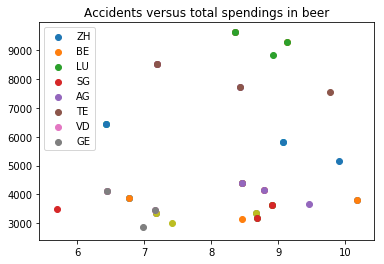

In [131]:
df_accident_canton = df_Accident_cantons.groupby(['canton']).sum()[['2006–2008', '2009–2011', '2012–2014']]

xSpendFuel = []
yAccident = []
for canton in spend_biere['Canton'].unique():
    xSpendFuel = []
    yAccident = []
    for period in spend_biere['annee'].unique():
        xSpendFuel.append(float(spend_biere[(spend_biere.Canton == canton) & (spend_biere.annee == period)]['Bières']))
        yAccident.append(df_accident_canton[period][canton])
        plt.scatter(xSpendFuel, yAccident)
        
plt.legend(spend_biere['Canton'].unique())
plt.title('Accidents versus total spendings in beer')
plt.show()

In [38]:
dict_cantons = dict()
dict_cantons['AA'] = ['Appenzell Rh.-Ext.','Appenzell Ausserrhoden']
dict_cantons['AG'] = ['Argovie','Aargau']
dict_cantons['AI'] = ['Appenzell Rh.-Int.','Appenzell Innerrhoden']
dict_cantons['BE'] = ['Berne', 'Bern', 'Bern / Berne']
dict_cantons['BL'] = ['Bâle-Campagne','Basel-Landschaft']
dict_cantons['BS'] = ['Bâle-Ville','Basel-Stadt']
dict_cantons['FR'] = ['Fribourg', 'Fribourg / Freiburg']
dict_cantons['GE'] = ['Genève', 'Genf']
dict_cantons['GL'] = ['Glaris', 'Glarus']
dict_cantons['GR'] = ['Grisons', 'Graubünden', 'Grigioni', 'Grischun', 'Graubünden / Grigioni / Grischun']
dict_cantons['JU'] = ['Jura']
dict_cantons['LU'] = ['Lucerne', 'Luzern']
dict_cantons['NE'] = ['Neuchâtel']
dict_cantons['NW'] = ['Nidwald', 'Nidwalden']
dict_cantons['OW'] = ['Obwald', 'Obwalden']
dict_cantons['SG'] = ['St. Gall', 'St. Gallen', 'Saint-Gall']
dict_cantons['SH'] = ['Schaffhouse', 'Schaffhausen']
dict_cantons['SO'] = ['Soleure', 'Solothurn']
dict_cantons['SZ'] = ['Schwytz', 'Schwyz']
dict_cantons['TE'] = ['Tessin', 'Ticino']
dict_cantons['TG'] = ['Thurgovie', 'Thurgau']
dict_cantons['UR'] = ['Uri']
dict_cantons['VS'] = ['Valais', 'Wallis', 'Valais / Wallis']
dict_cantons['VD'] = ['Vaud']
dict_cantons['ZG'] = ['Zoug', 'Zug']
dict_cantons['ZH'] = ['Zurich', 'Zürich']

In [25]:
def getKeysByValue(dictOfElements, valueToFind):
    '''
    find the key of a canton
    '''
    for item  in dictOfElements.items():
        if valueToFind in item[1]:
            return item[0]
            break
    raise NotImplementedError